In [3]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def load_scores(filepath):
    with open(filepath, "rb") as f:
        return pickle.load(f)
filepath = "gemma-scope-2b-pt-res-canonical_gemma-scope-9b-pt-res-canonical_multL_scores.pkl"
scores = load_scores(filepath)


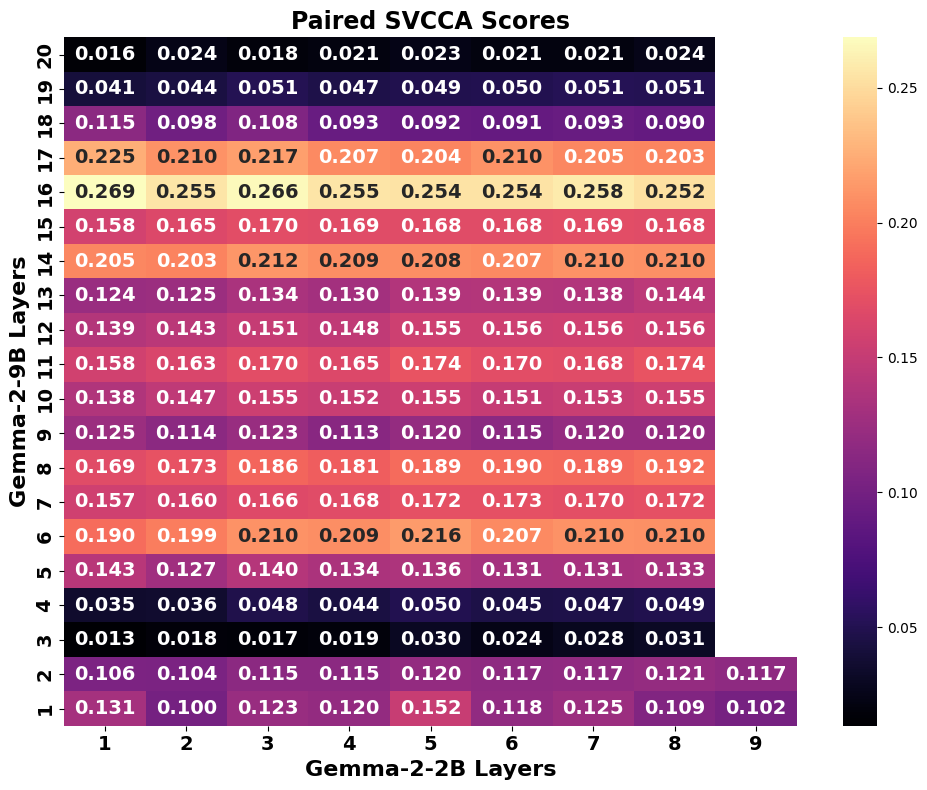

In [4]:
all_scores_paired_svcca = {}
modA_layer_to_dictscores = scores

for layerID_A, layer_to_dictscores in modA_layer_to_dictscores.items():
    if layerID_A == 0:
        continue
    layerID_A_scores_svcca = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        svcca_score = scores_dict['svcca_paired']
        layerID_A_scores_svcca[layerID_B] = svcca_score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores_svcca

scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)

# Remove subplots and directly plot the heatmap
plt.figure(figsize=(10, 8))

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontsize(14)
    label.set_fontweight('bold')

sns.heatmap(scores_df_svcca, annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'})

plt.title("Paired SVCCA Scores", fontsize=17, fontweight='bold')
plt.xlabel("Gemma-2-2B Layers", fontsize=16, fontweight='bold')
plt.ylabel("Gemma-2-9B Layers", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()

plt.savefig('heatmap_comparison.pdf')

plt.show()